In [37]:
# list library yang digunakan
from google.colab.patches import cv2_imshow as imshow
import numpy as np
import cv2 as cv

In [58]:
# !wget 'https://1.bp.blogspot.com/-fLhlEURDf_k/YR0DgFDG8vI/AAAAAAAAK0o/ARBzAtESnwo5hG5Xm_IBCiyeeKMmpVjjQCLcBGAsYHQ/w1200-h630-p-k-no-nu/Indonesia%2BRaya%2Bangka%2Bbaru%2BPNG.png' -O indonesia_raya.jpg
# !wget 'https://929687.smushcdn.com/2633864/wp-content/uploads/2020/08/opencv_sudoku_puzzle_sudoku_puzzle.jpg?lossy=1&strip=1&webp=1' -O sudoku.jpg
# !wget 'https://1.bp.blogspot.com/-1wb03KPrTMM/Upgg4l3Jp-I/AAAAAAAAA4s/0Xhc-21ct2Q/s1600/SelamatHariNatalDanTahunBaru-PianoVersion.jpg' -O xmas.jpg

--2022-12-22 05:01:52--  https://1.bp.blogspot.com/-1wb03KPrTMM/Upgg4l3Jp-I/AAAAAAAAA4s/0Xhc-21ct2Q/s1600/SelamatHariNatalDanTahunBaru-PianoVersion.jpg
Resolving 1.bp.blogspot.com (1.bp.blogspot.com)... 142.251.8.132, 2404:6800:4008:c15::84
Connecting to 1.bp.blogspot.com (1.bp.blogspot.com)|142.251.8.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109815 (107K) [image/jpeg]
Saving to: ‘xmas.jpg’

xmas.jpg            100%[===================>] 107.24K  --.-KB/s    in 0.001s  

2022-12-22 05:01:52 (91.3 MB/s) - ‘xmas.jpg’ saved [109815/109815]



In [39]:
# !gdown '1IGsSBdFN6CwzQURzrdAU3Lh39k5pQtvK' -O citra_part.jpg
# !gdown '1RnzYVEEsuutEBY7vlwHHtjdCRjB8FowD' -O citra_aks.jpg
# !gdown '17xDpfZYwlg2V3KB54C4JVD9b2x_k10Qv' -O citra_aks_2.jpg

## Function

In [40]:
# resize
def resize(img, scale):
  scale_percent = scale # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
    
  # resize image
  img_resized = cv.resize(img, dim, interpolation = cv.INTER_AREA)
  return img_resized

In [41]:
# Loop until erosion leads to an empty set
def thinning(img, kernel):
  img1 = img.copy()
  thin = np.zeros(img.shape,dtype='uint8')
  while (cv.countNonZero(img1)!=0):
      # Erosion
      erode = cv.erode(img1,kernel)
      # Opening on eroded image
      opening = cv.morphologyEx(erode,cv.MORPH_OPEN,kernel)
      # Subtract these two
      subset = erode - opening
      # Union of all previous sets
      thin = cv.bitwise_or(subset,thin)
      # Set the eroded image for next iteration
      img1 = erode.copy()
  return thin

## Main

(502, 760, 3)


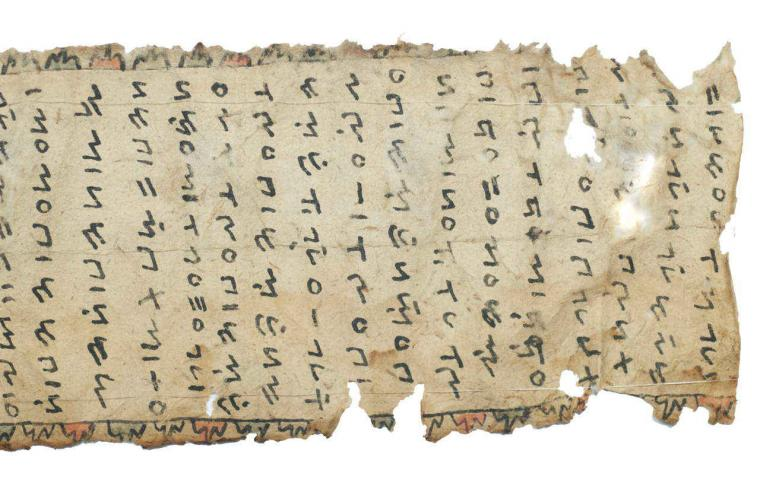

In [42]:
img = cv.imread('citra_aks.jpg')
print(img.shape)
imshow(img)

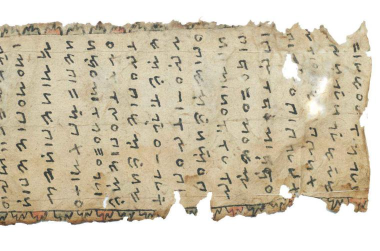

In [43]:
img_resized = resize(img, 50)
imshow(img_resized)

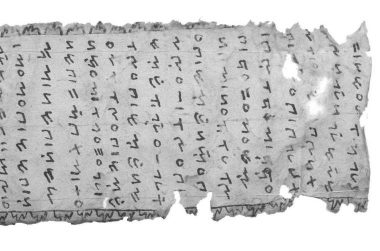

In [44]:
img_gray = cv.cvtColor(img_resized, cv.COLOR_BGR2GRAY)
imshow(img_gray)

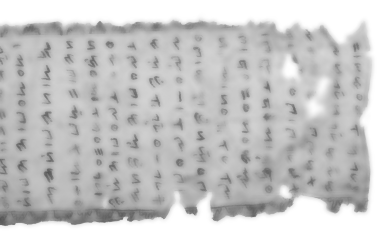

In [45]:
blur = cv.bilateralFilter(img_gray,9,75,75)
imshow(blur)

216.0


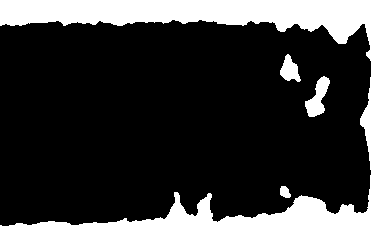

In [46]:
ret2,img_otsu = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print(ret2)
imshow(img_otsu)

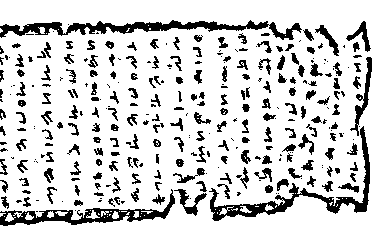

In [47]:
img_gauss = cv.adaptiveThreshold(blur,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
imshow(img_gauss)

In [48]:
kernel = np.array([
    [0,1,0],
    [0,1,0],
    [0,1,0]
], np.uint8)

In [49]:
# img_thin = thinning(img_gauss, kernel)
# imshow(img_thin)

In [50]:
def line_segment(img):
  img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  ret, thresh2 = cv.threshold(img_gray, 150, 255, cv.THRESH_BINARY_INV)
  kernel = cv.getStructuringElement(cv.MORPH_RECT, (150,2))
  mask = cv.morphologyEx(thresh2, cv.MORPH_DILATE, kernel)
  
  bboxes = []
  bboxes_img = img.copy()
  contours = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  contours = contours[0] if len(contours) == 2 else contours[1]
  for cntr in contours:
      x,y,w,h = cv.boundingRect(cntr)
      cv.rectangle(bboxes_img, (x, y), (x+w, y+h), (0,0,255), 1)
      bboxes.append((x,y,w,h))

  return bboxes_img

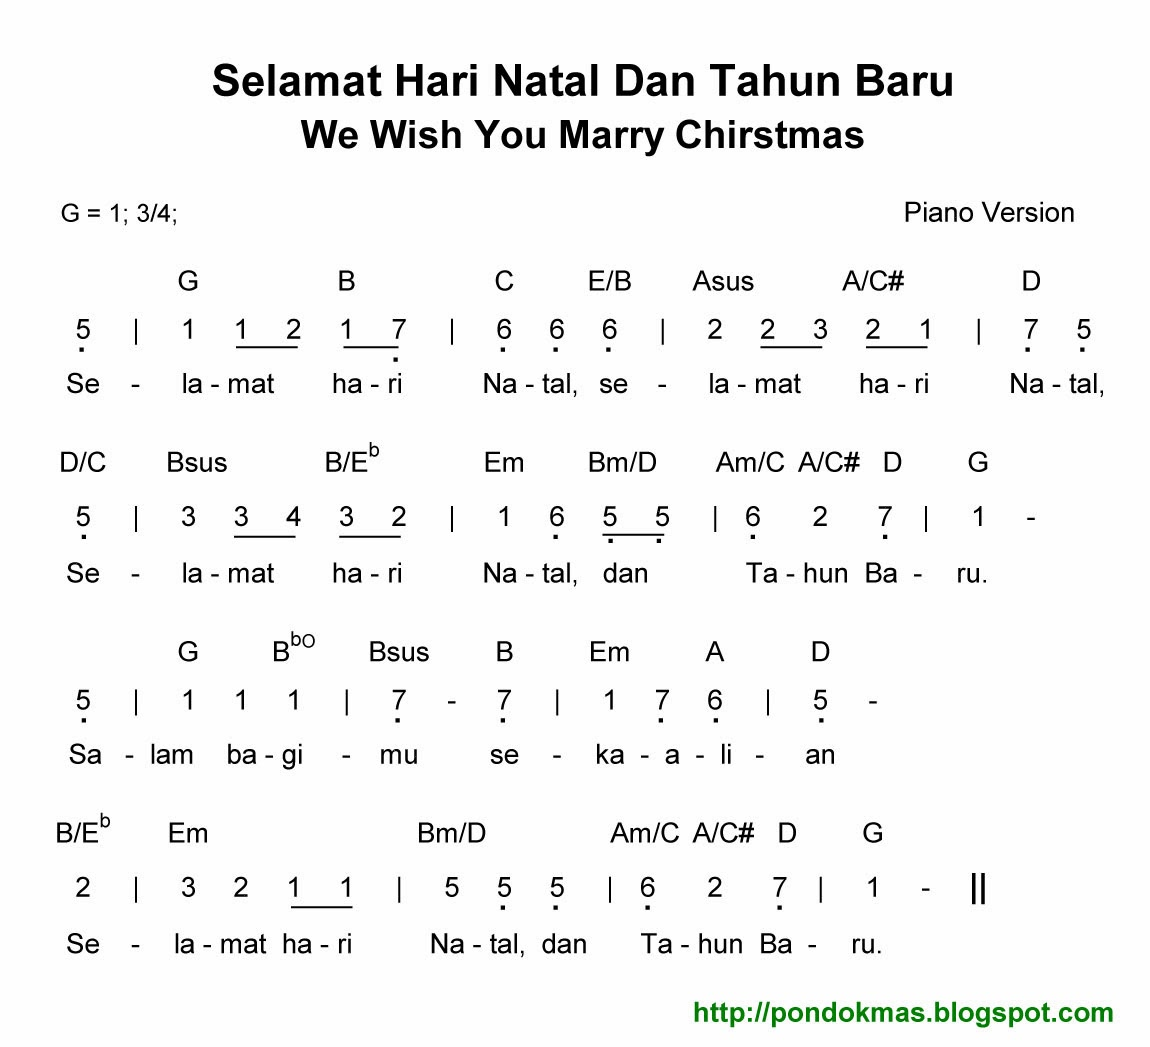

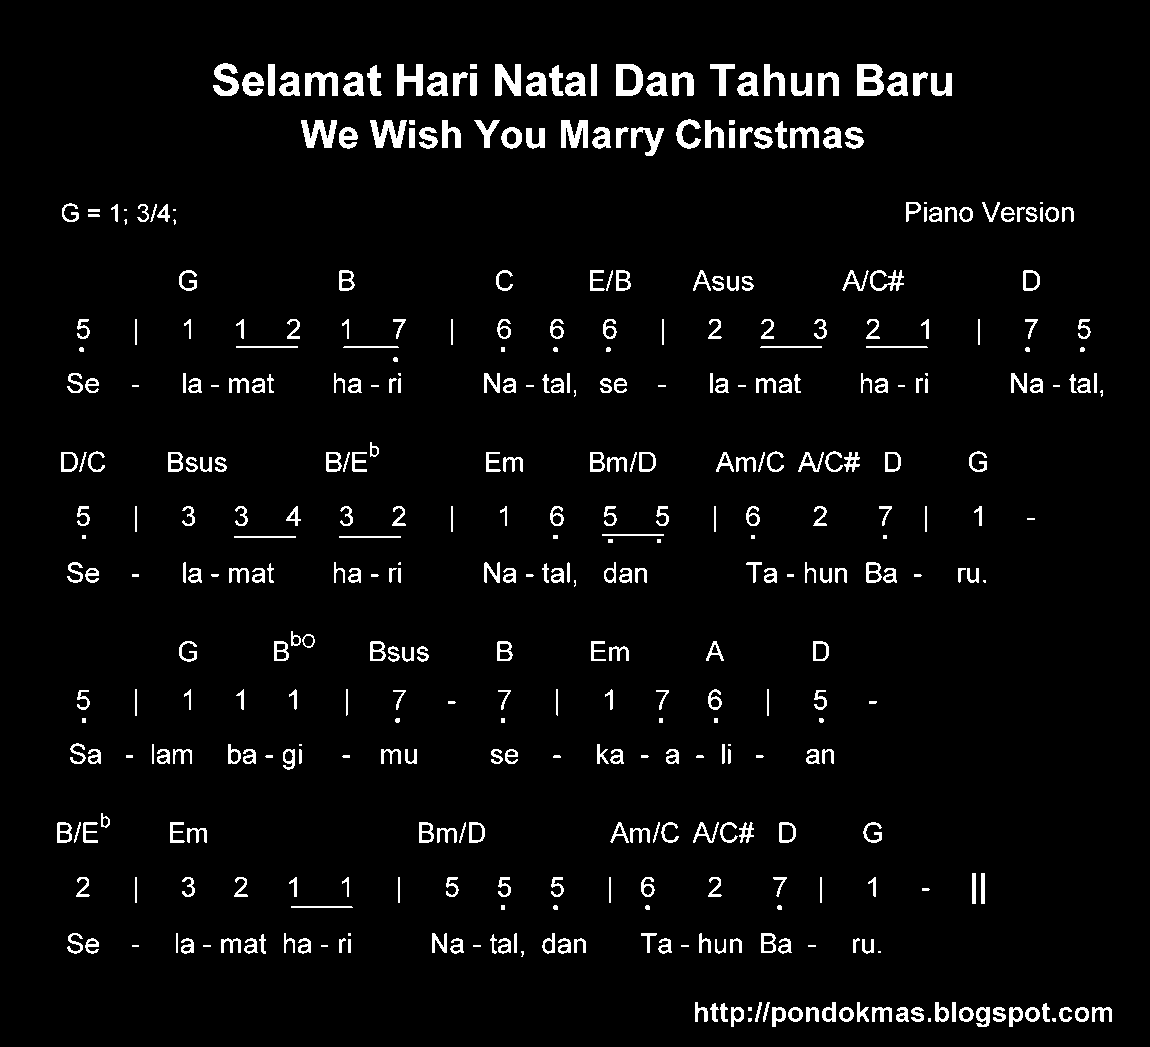

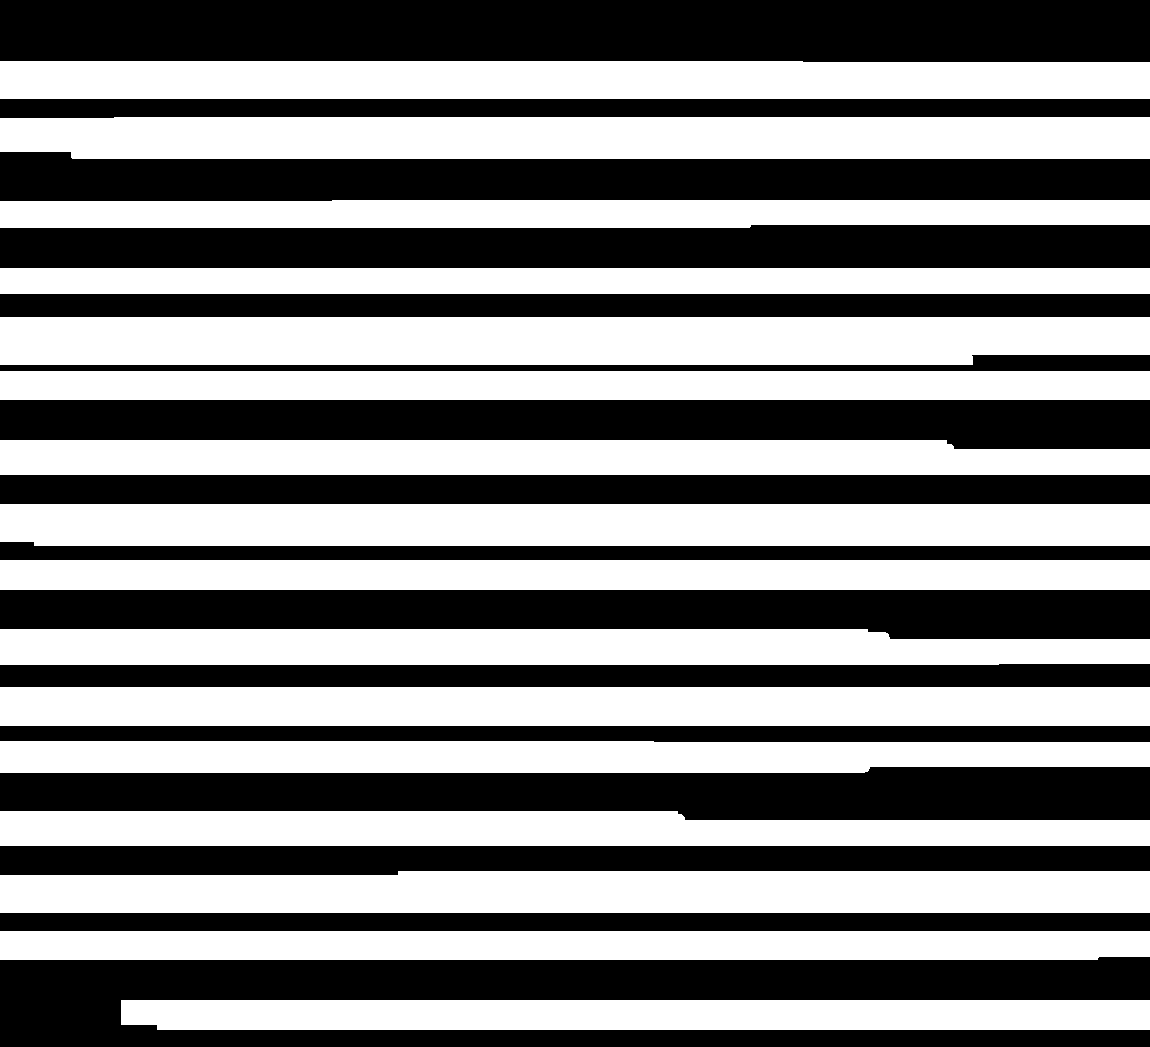

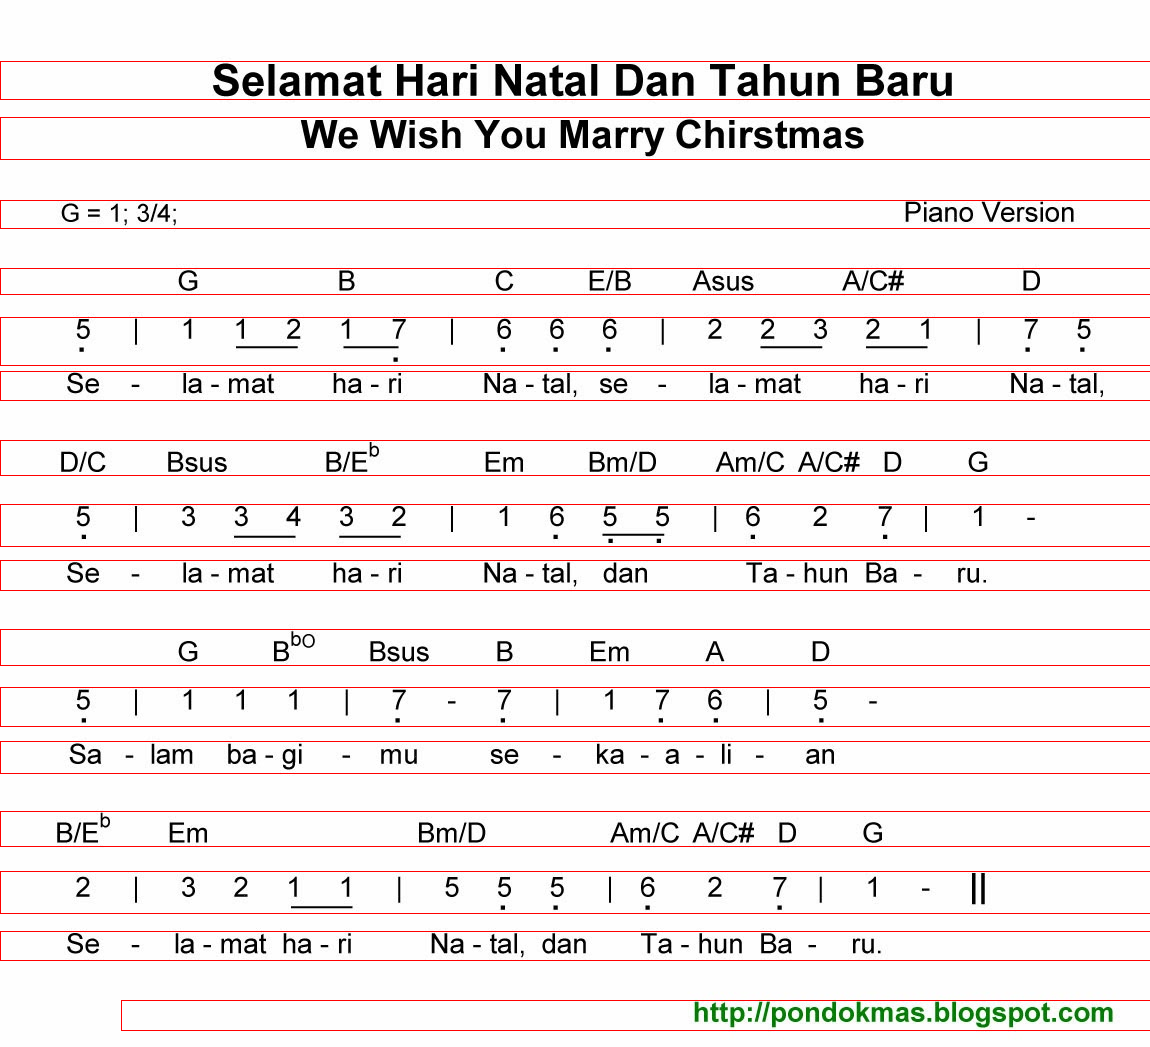

In [61]:
# line segment

img = cv.imread('xmas.jpg')
# img = resize(img, 50)
# print(img.shape)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh2 = cv.threshold(img_gray, 150, 255, cv.THRESH_BINARY_INV)
kernel = cv.getStructuringElement(cv.MORPH_RECT, (img.shape[1],6))
mask = cv.morphologyEx(thresh2, cv.MORPH_DILATE, kernel)

bboxes = []
bboxes_img = img.copy()
contours = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    x,y,w,h = cv.boundingRect(cntr)
    cv.rectangle(bboxes_img, (x, y), (x+w, y+h), (0,0,255), 1)
    bboxes.append((x,y,w,h))

imshow(img)
imshow(thresh2)
imshow(mask)
imshow(bboxes_img)

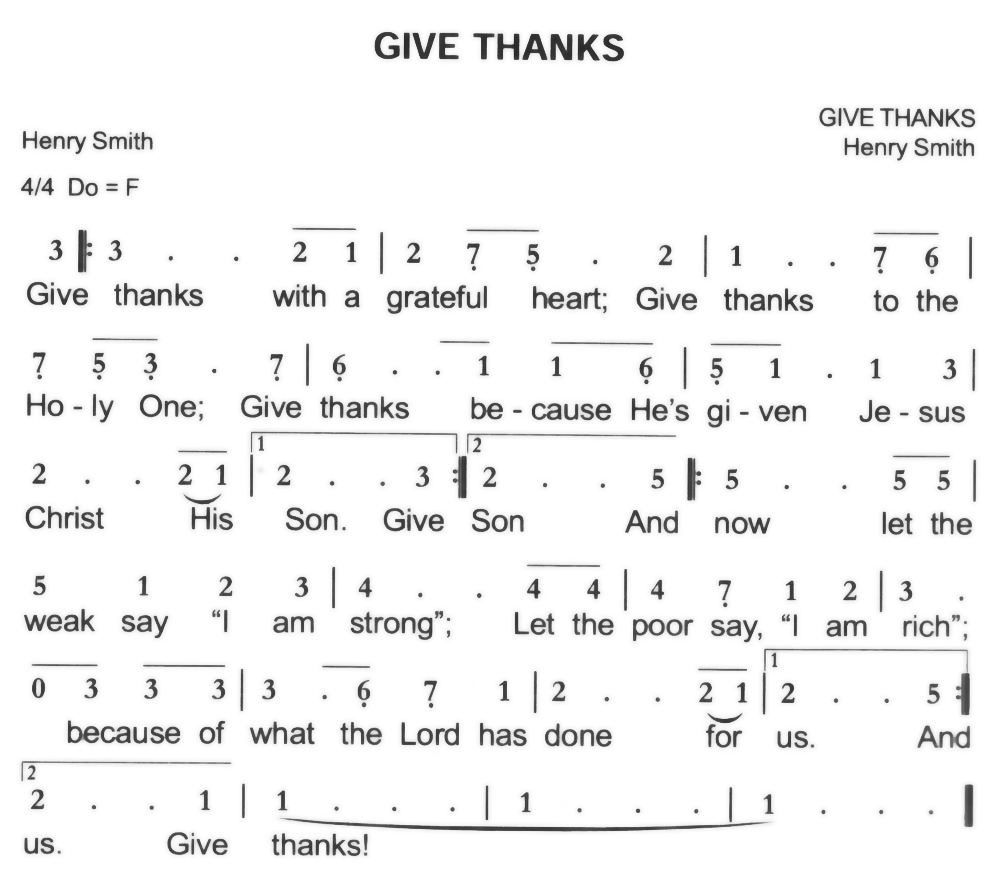

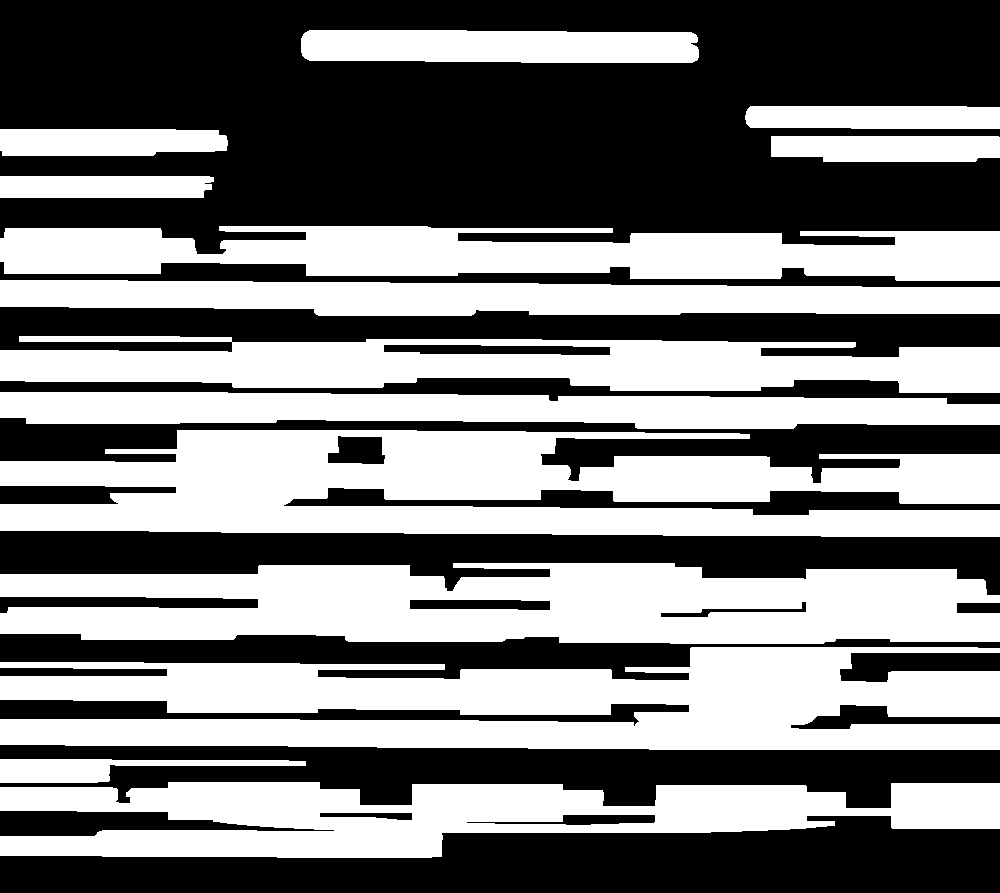

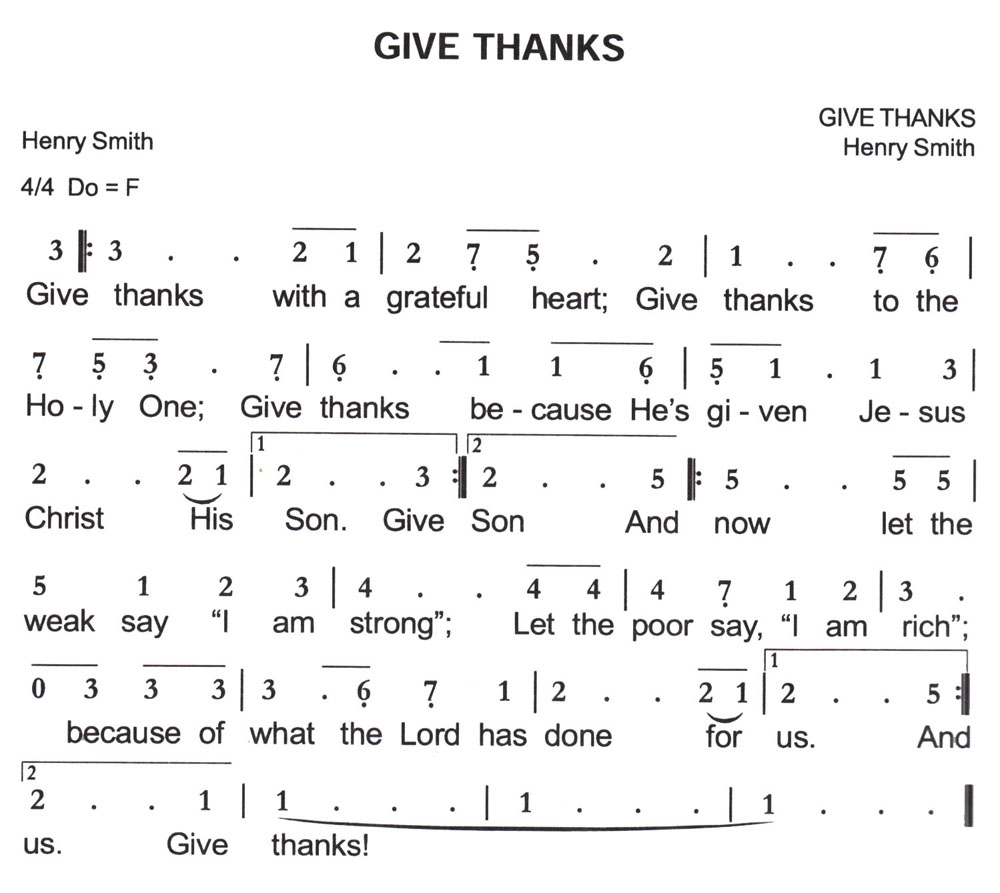

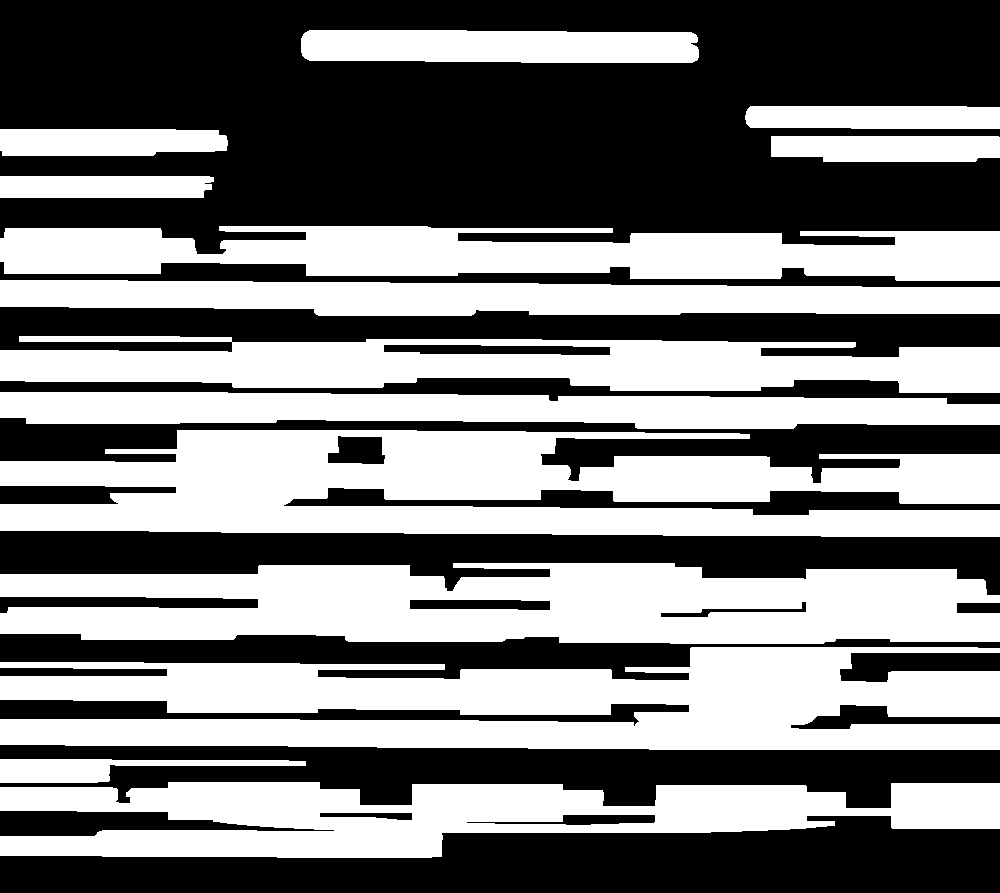

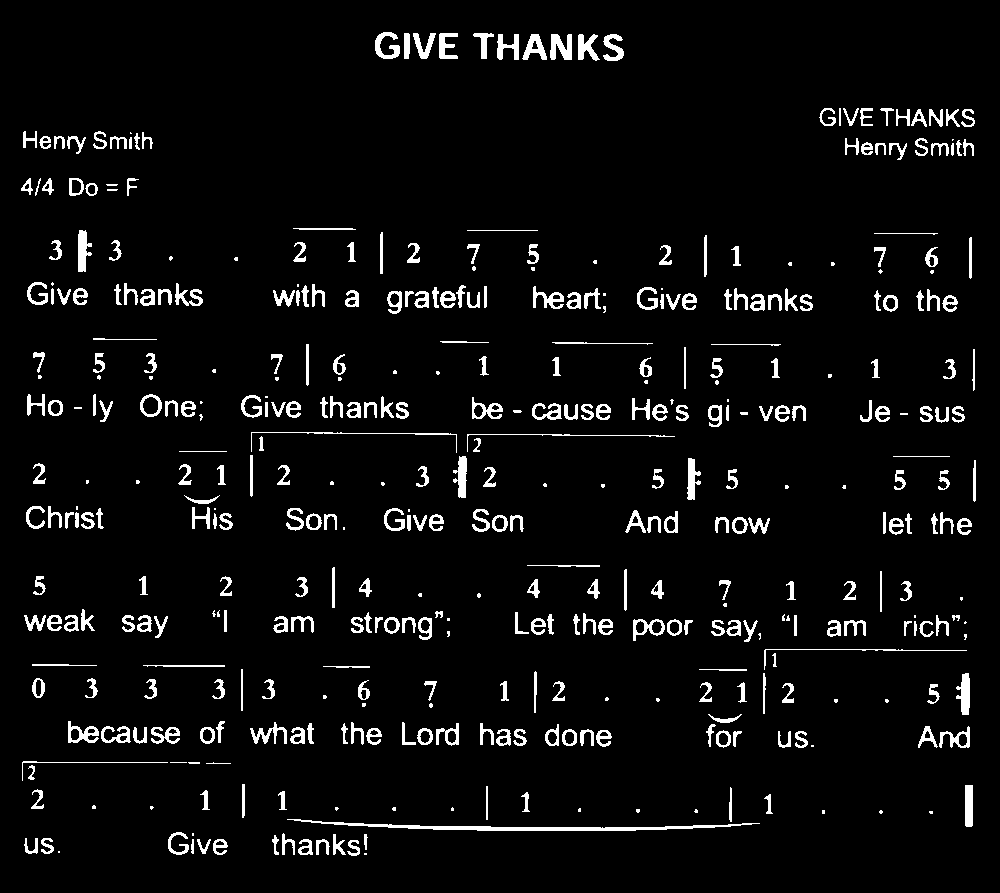

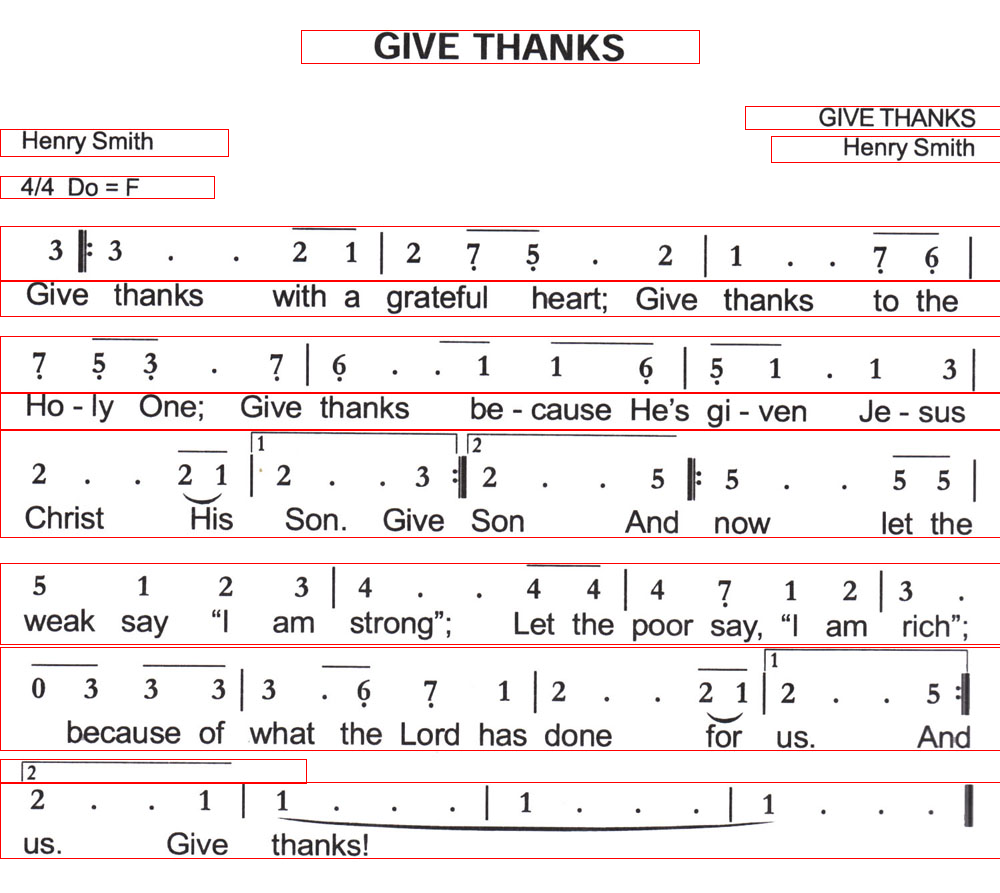

In [52]:
# line_segment

img = cv.imread('citra_part.jpg')
# img = resize(img, 50)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# img_gray = cv.medianBlur(img_gray,5)
img_gray = cv.bilateralFilter(img_gray,9,75,75)
imshow(img_gray)

ret, thresh2 = cv.threshold(img_gray, 150, 255, cv.THRESH_BINARY_INV)
kernel = cv.getStructuringElement(cv.MORPH_RECT, (150,5))
mask = cv.morphologyEx(thresh2, cv.MORPH_DILATE, kernel)

imshow(mask)
# imshow(mask2)

# imshow(mask - mask2)

bboxes = []
bboxes_img = img.copy()
contours = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    x,y,w,h = cv.boundingRect(cntr)
    cv.rectangle(bboxes_img, (x, y), (x+w, y+h), (0,0,255), 1)
    bboxes.append((x,y,w,h))

imshow(img)
imshow(mask)
imshow(thresh2)
imshow(bboxes_img)

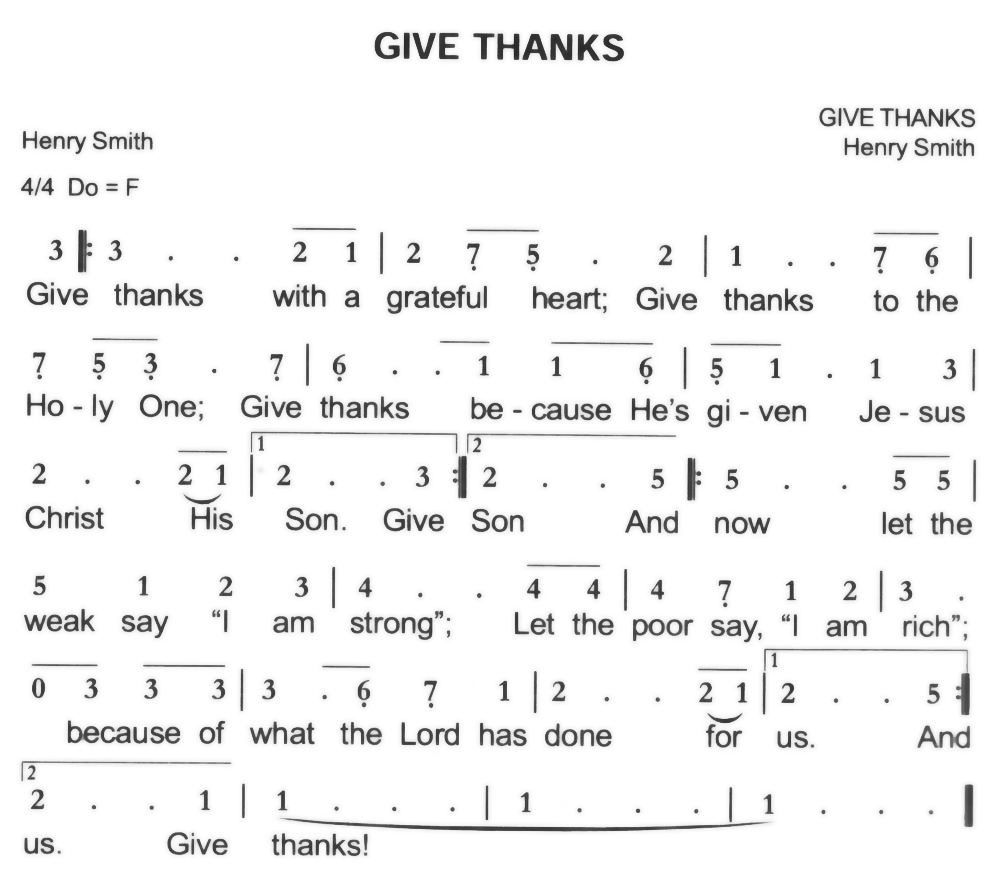

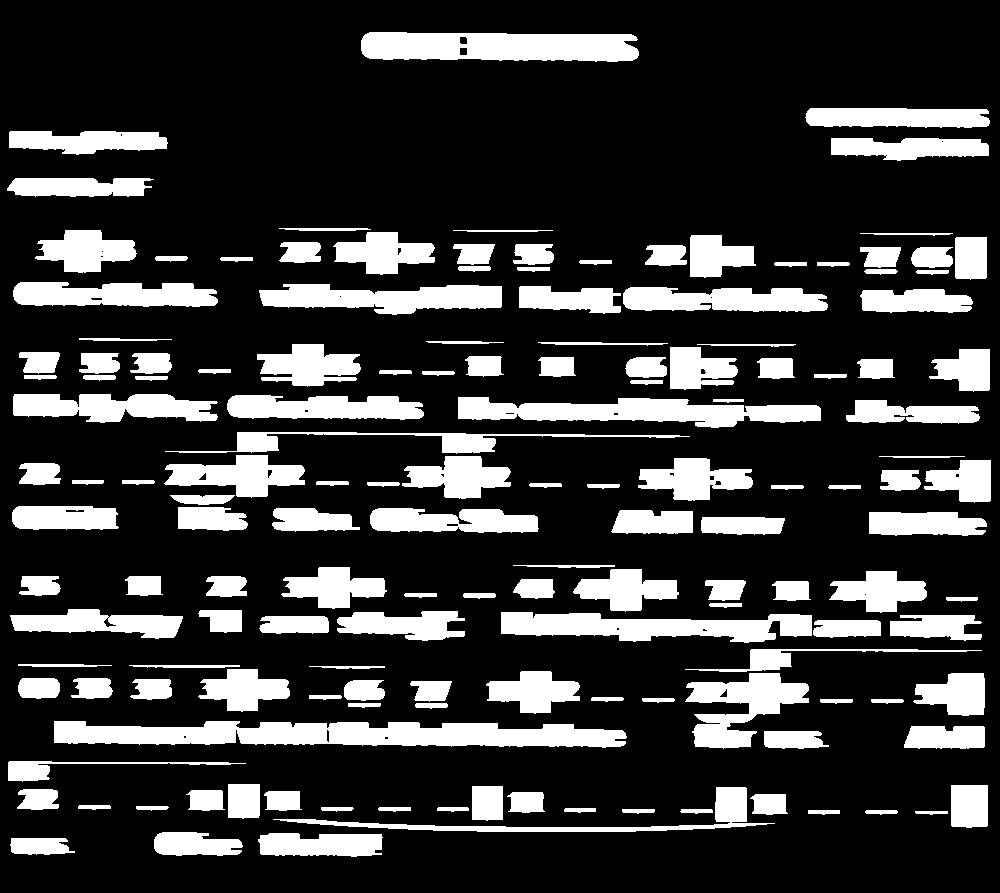

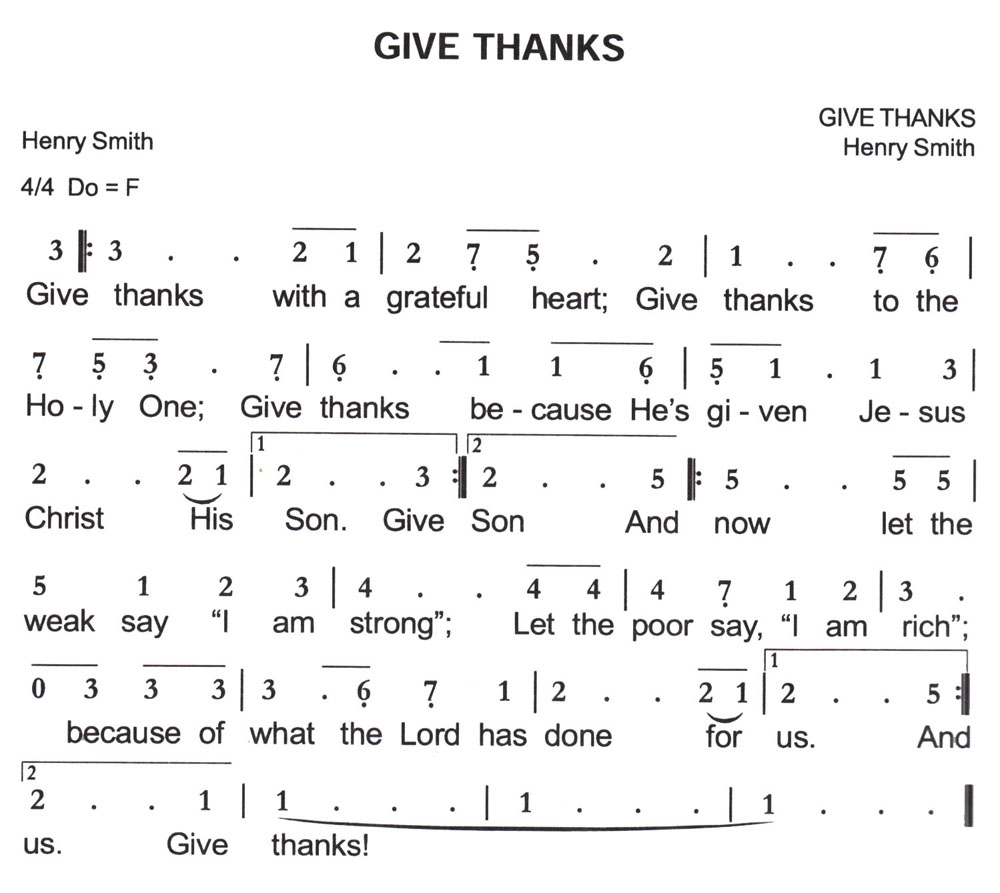

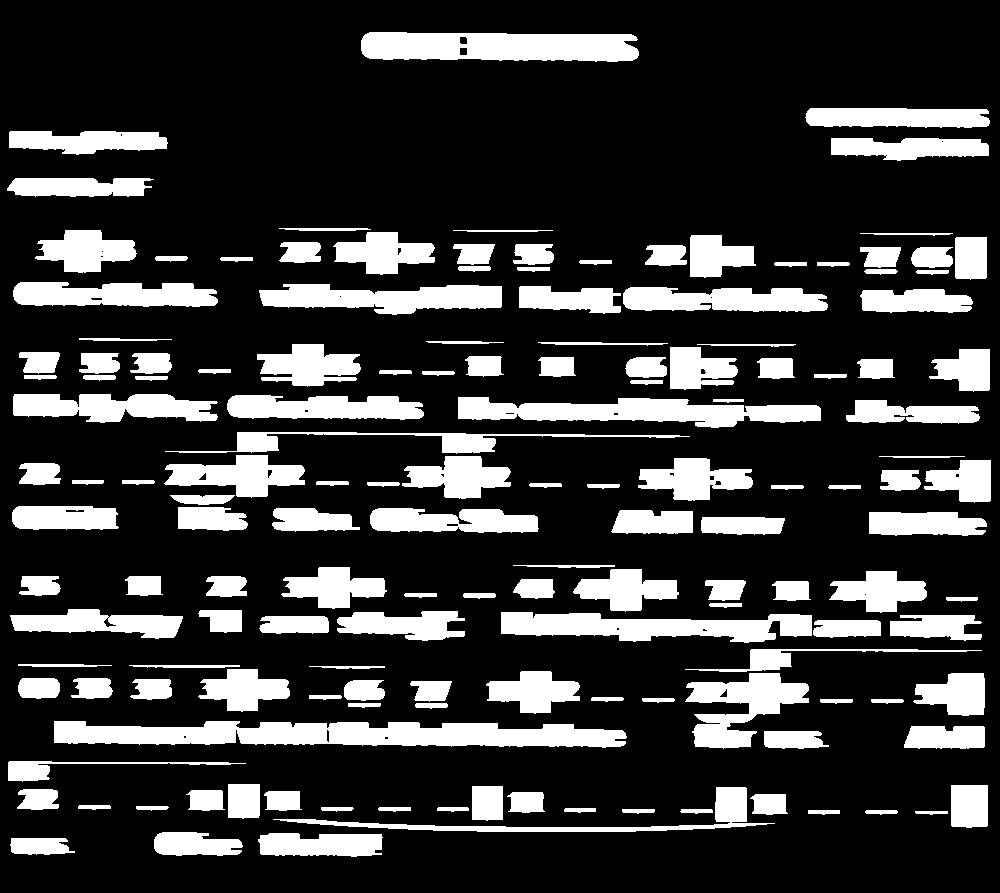

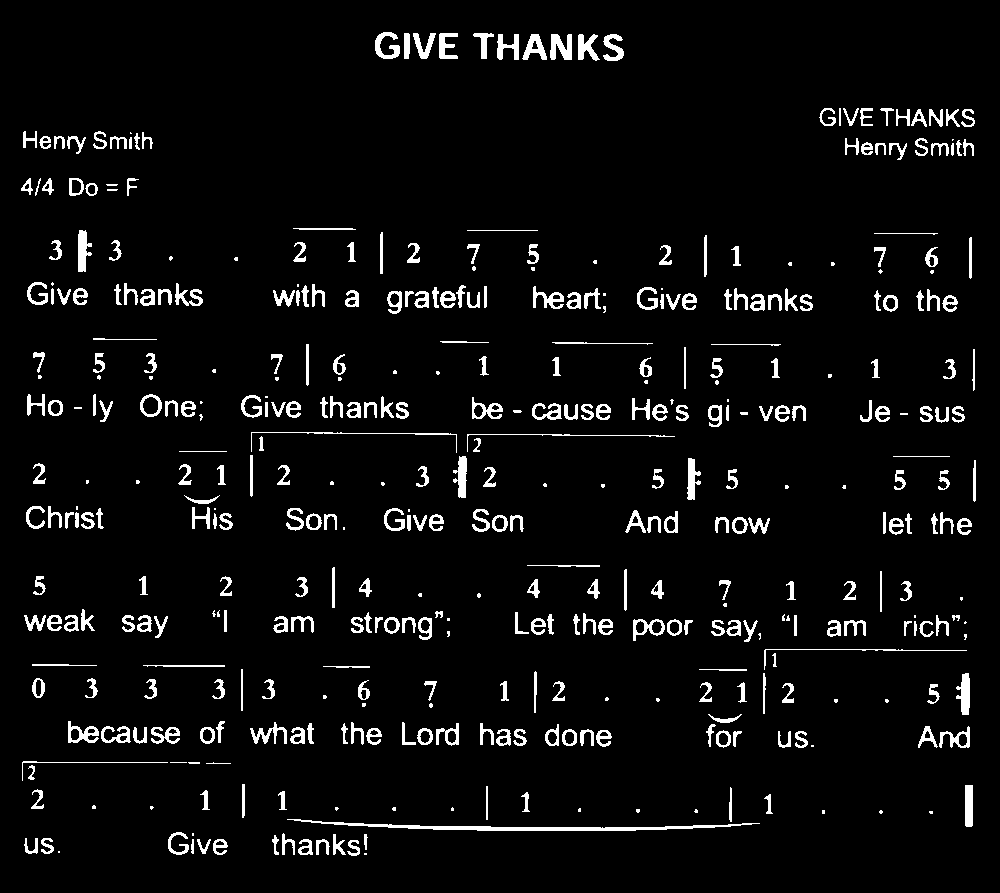

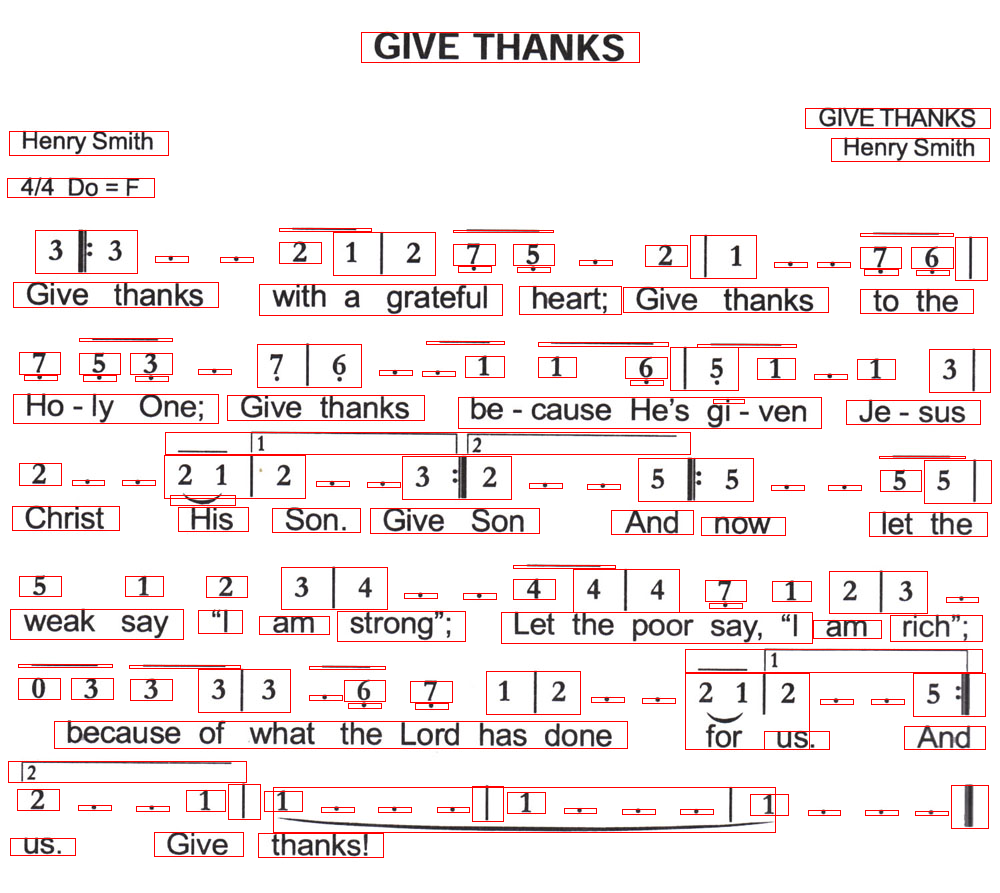

In [53]:
# line_process

img = cv.imread('citra_part.jpg')
# img = resize(img, 50)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img_gray = cv.bilateralFilter(img_gray,9,75,75)
imshow(img_gray)

ret, thresh2 = cv.threshold(img_gray, 150, 255, cv.THRESH_BINARY_INV)
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (30,2))
mask = cv.morphologyEx(thresh2, cv.MORPH_DILATE, kernel)

# mask2 = cv.morphologyEx(mask, cv.MORPH_ERODE, kernel)
# mask2 = cv.morphologyEx(mask2, cv.MORPH_GRADIENT, kernel)

imshow(mask)
# imshow(mask2)

# imshow(mask - mask2)

bboxes = []
bboxes_img = img.copy()
contours = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    x,y,w,h = cv.boundingRect(cntr)
    cv.rectangle(bboxes_img, (x, y), (x+w, y+h), (0,0,255), 1)
    bboxes.append((x,y,w,h))

imshow(img)
imshow(mask)
imshow(thresh2)
imshow(bboxes_img)

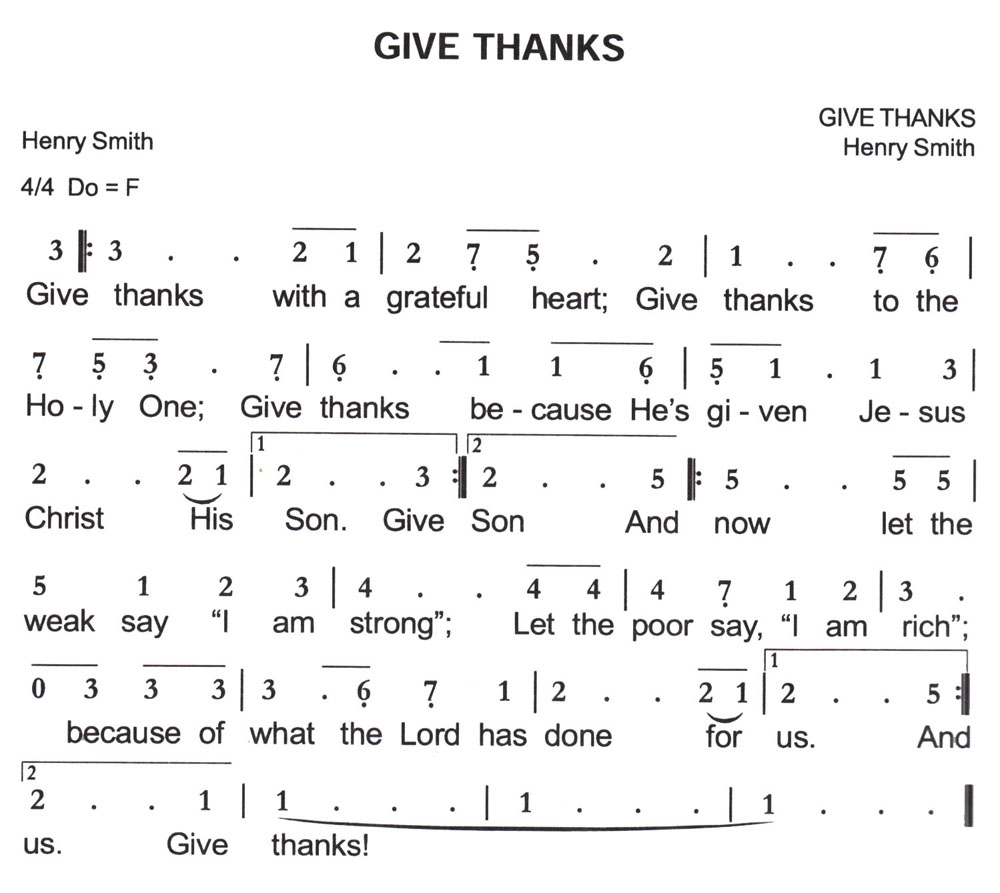

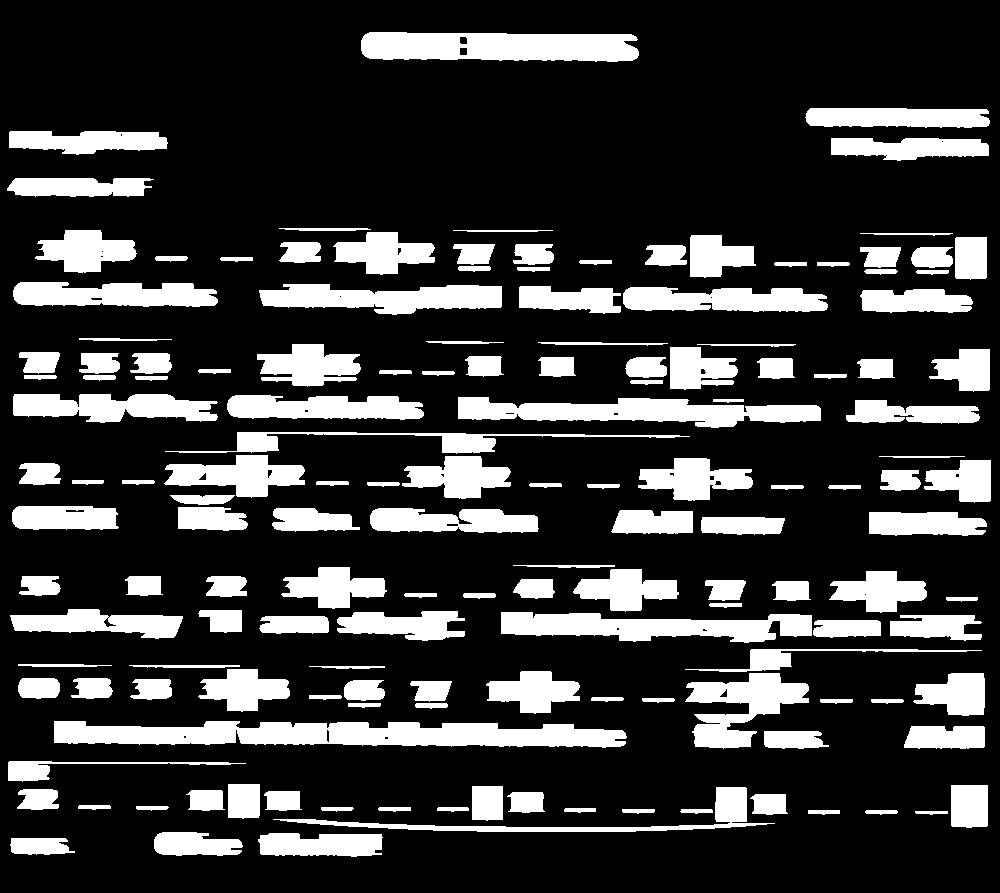

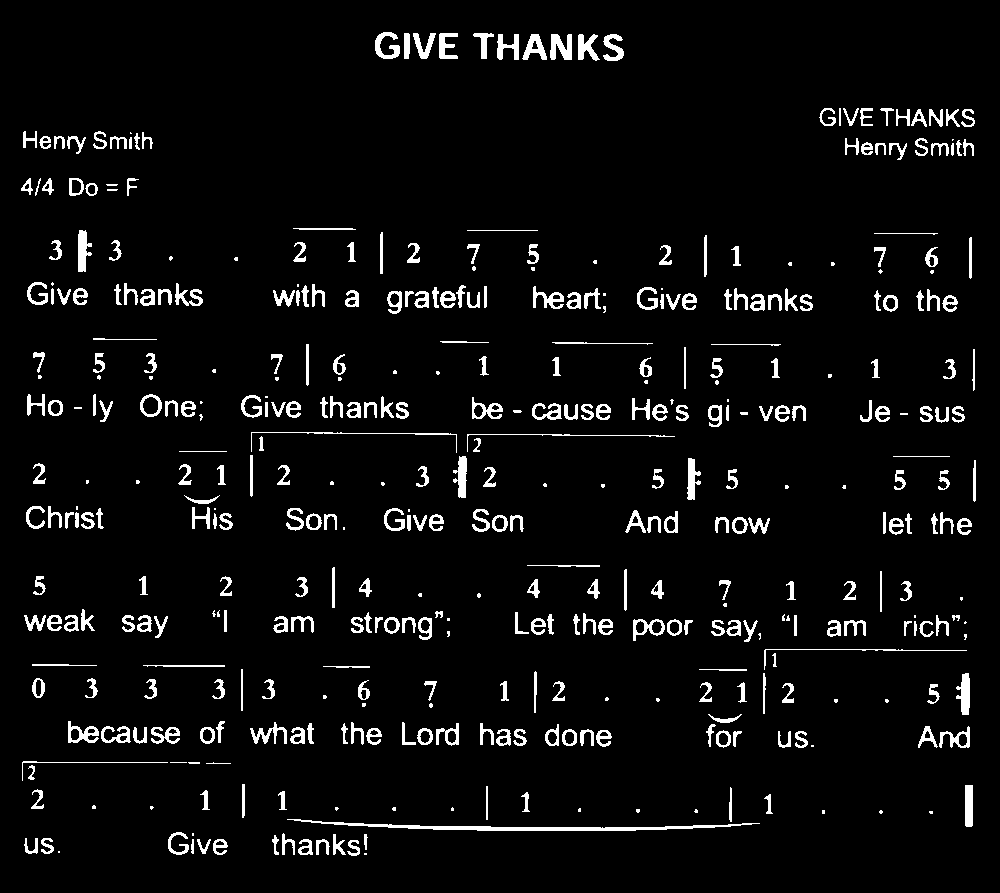

In [54]:
imshow(img)
imshow(mask)
imshow(thresh2)

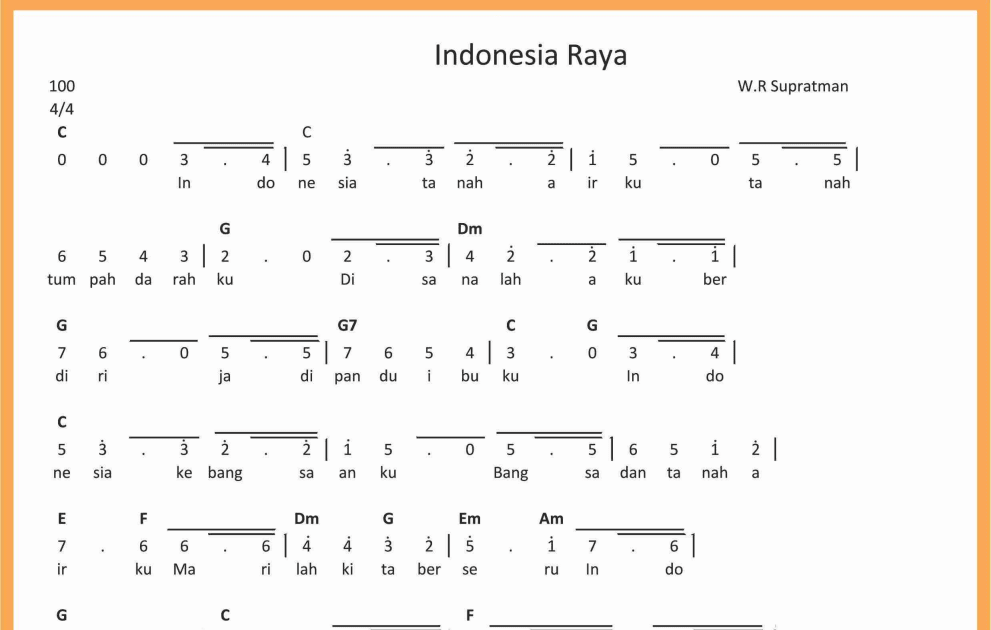

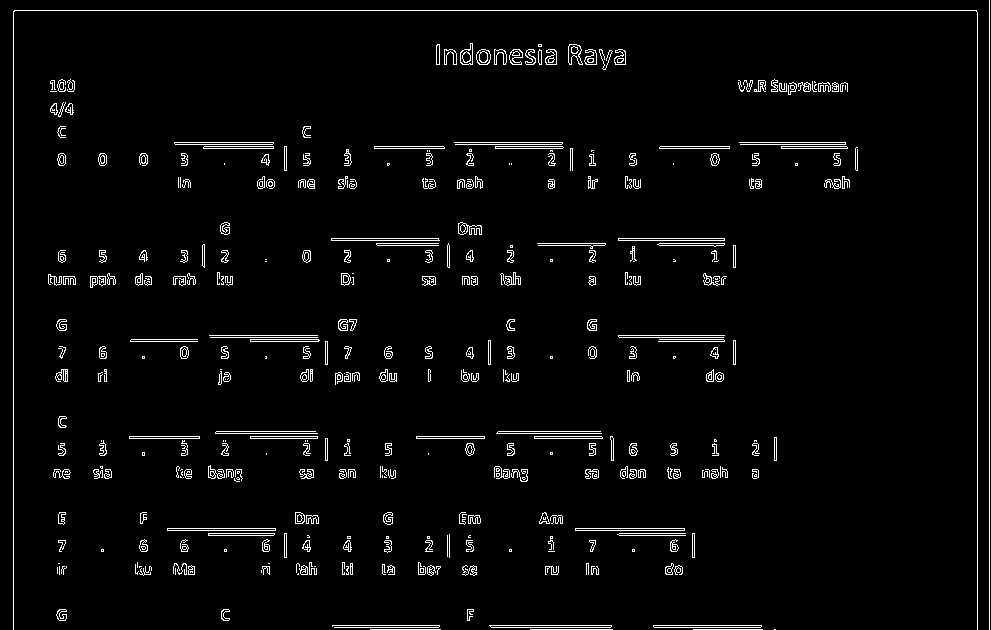

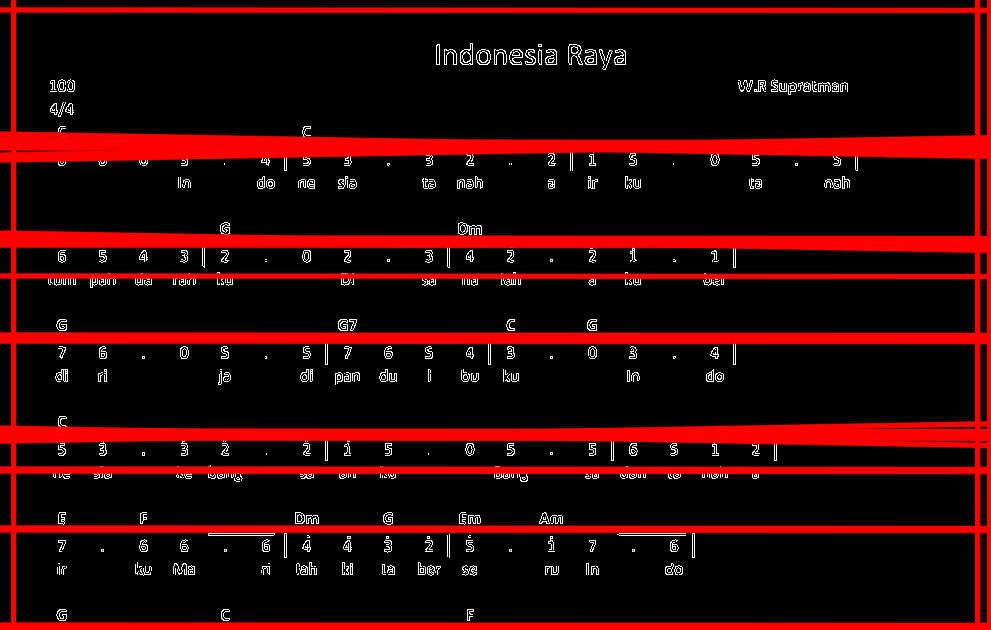

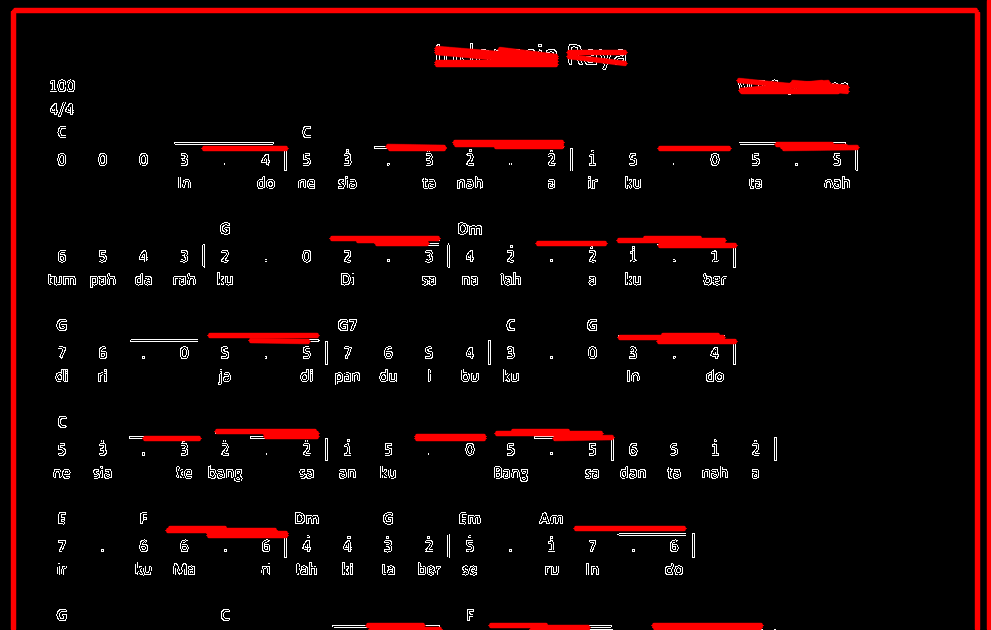

In [55]:
import sys
import math
import cv2 as cv
import numpy as np

src = cv.imread('indonesia_raya.jpg')

dst = cv.Canny(src, 50, 200, None, 3)
    
# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
  for i in range(0, len(lines)):
      rho = lines[i][0][0]
      theta = lines[i][0][1]
      a = math.cos(theta)
      b = math.sin(theta)
      x0 = a * rho
      y0 = b * rho
      pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
      pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
      cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)


linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

if linesP is not None:
  for i in range(0, len(linesP)):
      l = linesP[i][0]
      cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

imshow(src)
imshow(dst)
imshow(cdst)
imshow(cdstP)

### sift

In [56]:
# sift = cv.SIFT_create()
# kp = sift.detect(img_gray,None)
# img=cv.drawKeypoints(img_gray,kp,img)
# # cv.imwrite('sift_keypoints.jpg',img)
# imshow(img)

### catetan

In [57]:
display(len(contours))
display(bboxes)
kernel

152

[(10, 838, 65, 17),
 (258, 833, 125, 24),
 (154, 832, 89, 24),
 (915, 811, 33, 4),
 (865, 810, 33, 5),
 (808, 810, 32, 5),
 (680, 809, 33, 5),
 (622, 809, 33, 5),
 (564, 808, 32, 5),
 (437, 807, 32, 5),
 (378, 807, 33, 5),
 (321, 807, 33, 5),
 (136, 806, 33, 5),
 (78, 805, 33, 5),
 (750, 794, 38, 21),
 (507, 792, 38, 21),
 (264, 791, 38, 20),
 (186, 790, 39, 21),
 (17, 789, 42, 21),
 (273, 787, 502, 45),
 (472, 786, 31, 35),
 (951, 785, 37, 43),
 (228, 784, 32, 35),
 (8, 761, 238, 21),
 (764, 731, 65, 18),
 (904, 726, 81, 23),
 (54, 721, 573, 27),
 (415, 703, 33, 6),
 (348, 703, 33, 5),
 (871, 699, 33, 5),
 (820, 699, 33, 5),
 (642, 698, 33, 5),
 (591, 697, 33, 5),
 (309, 695, 33, 5),
 (410, 681, 42, 21),
 (344, 680, 41, 21),
 (130, 679, 42, 21),
 (71, 678, 42, 21),
 (18, 678, 42, 21),
 (913, 673, 72, 43),
 (685, 673, 124, 76),
 (486, 671, 94, 43),
 (198, 669, 92, 43),
 (309, 666, 76, 3),
 (129, 665, 111, 3),
 (18, 664, 94, 3),
 (685, 649, 297, 23),
 (813, 620, 68, 18),
 (259, 616, 70,

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)